In [1]:
import sys
sys.path.insert(0,'../')
from libs.ssl_task import RelativePositioning, CPC
from libs.ssl_data import SSLHBNDataModule
%load_ext autoreload
%autoreload 2

In [2]:
# load config from runs/config_CPC.yaml
import yaml
with open('../runs/config_CPC.yaml', 'r') as f:
    config = yaml.safe_load(f)

ssl_task = CPC()
config['data']['ssl_task'] = ssl_task
config['data']['window_len_s'] = 20
config['data']['num_workers'] = 2
litDataModule = SSLHBNDataModule(**config['data'])

In [3]:
litDataModule.setup(stage='fit')

## p_factor

In [6]:
val_ds = litDataModule.valid_ds
p_factor = val_ds.description['p_factor'].dropna()

In [7]:
# get mean, std, median, iqr, min, max of p_factor
mean = p_factor.mean()
std = p_factor.std()
median = p_factor.median()
iqr = p_factor.quantile(0.75) - p_factor.quantile(0.25)
min_val = p_factor.min()
max_val = p_factor.max()
print(f'mean: {mean}, std: {std}, median: {median}, iqr: {iqr}, min: {min_val}, max: {max_val}')
print(f'mean + std: {mean + std}, mean - std: {mean - std}')

mean: -0.01793181818181817, std: 0.8889808316155502, median: -0.07450000000000001, iqr: 1.21875, min: -1.909, max: 2.144
mean + std: 0.871049013433732, mean - std: -0.9069126497973684


In [9]:
import torch
p_factor.abs().mean()

0.7174318181818183

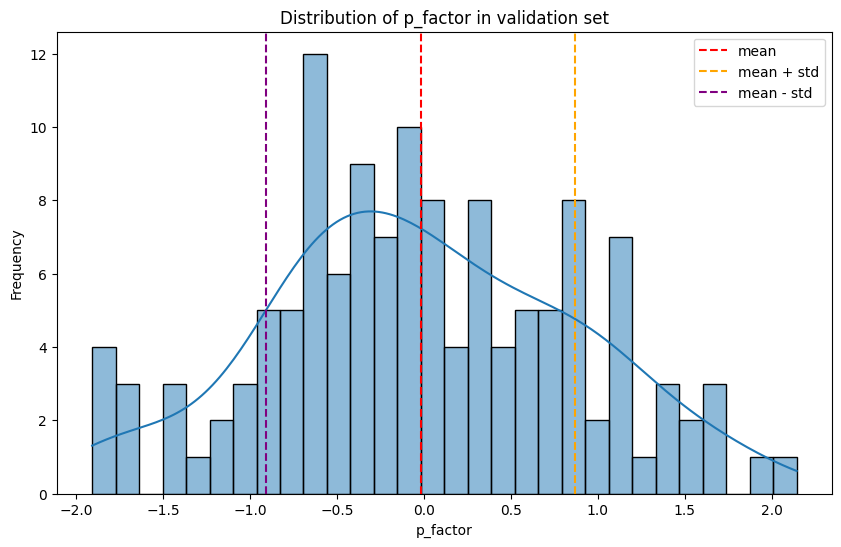

mean: -0.01793181818181817, mean + std: 0.871049013433732, mean - std: -0.9069126497973684


In [17]:
# plot distribution of p_factor
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(p_factor, bins=30, kde=True)
plt.title('Distribution of p_factor in validation set')
plt.xlabel('p_factor')
plt.ylabel('Frequency')
plt.axvline(mean, color='r', linestyle='--', label='mean')
# plt.axvline(median, color='g', linestyle='--', label='median')
plt.axvline(mean + std, color='orange', linestyle='--', label='mean + std')
plt.axvline(mean - std, color='purple', linestyle='--', label='mean - std')
# plt.axvline(median + iqr, color='pink', linestyle='--', label='median + iqr')
# plt.axvline(median - iqr, color='brown', linestyle='--', label='median - iqr')
plt.legend()
plt.show()
print(f'mean: {mean}, mean + std: {mean + std}, mean - std: {mean - std}')

## Age

In [ ]:
val_ds = litDataModule.valid_ds
age = val_ds.description['age'].dropna()

In [ ]:
age.abs().mean()

10.092837878787877

In [ ]:
# get mean, std, median, iqr, min, max of age
mean = age.mean()
std = age.std()
median = age.median()
iqr = age.quantile(0.75) - age.quantile(0.25)
min_val = age.min()
max_val = age.max()
print(f'mean: {mean}, std: {std}, median: {median}, iqr: {iqr}, min: {min_val}, max: {max_val}')
print(f'mean + std: {mean + std}, mean - std: {mean - std}')

mean: 10.092837878787877, std: 3.1643328992831243, median: 9.5084, iqr: 4.921, min: 5.162, max: 16.5816
mean + std: 13.257170778071002, mean - std: 6.928504979504753


## Sex

In [15]:
train_ds = litDataModule.train_ds
sex = train_ds.description['sex'].dropna()
sex.value_counts(normalize=True)

sex
M    0.652123
F    0.347877
Name: proportion, dtype: float64

In [13]:
val_ds = litDataModule.valid_ds
sex = val_ds.description['sex'].dropna()
sex.value_counts(normalize=True)

sex
M    0.674242
F    0.325758
Name: proportion, dtype: float64